In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**DATA CLEANING IN TRAIN DATA(CSV FILE)**

In [2]:
train_data=pd.read_csv("../input/titanic/train.csv") 
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_data.var()

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:ylabel='Frequency'>

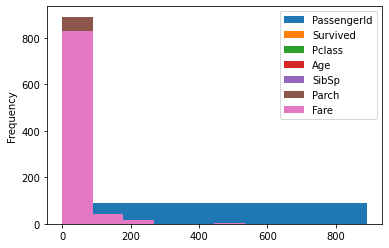

In [7]:
train_data.plot.hist()

**DATA VISUALIZATION**

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

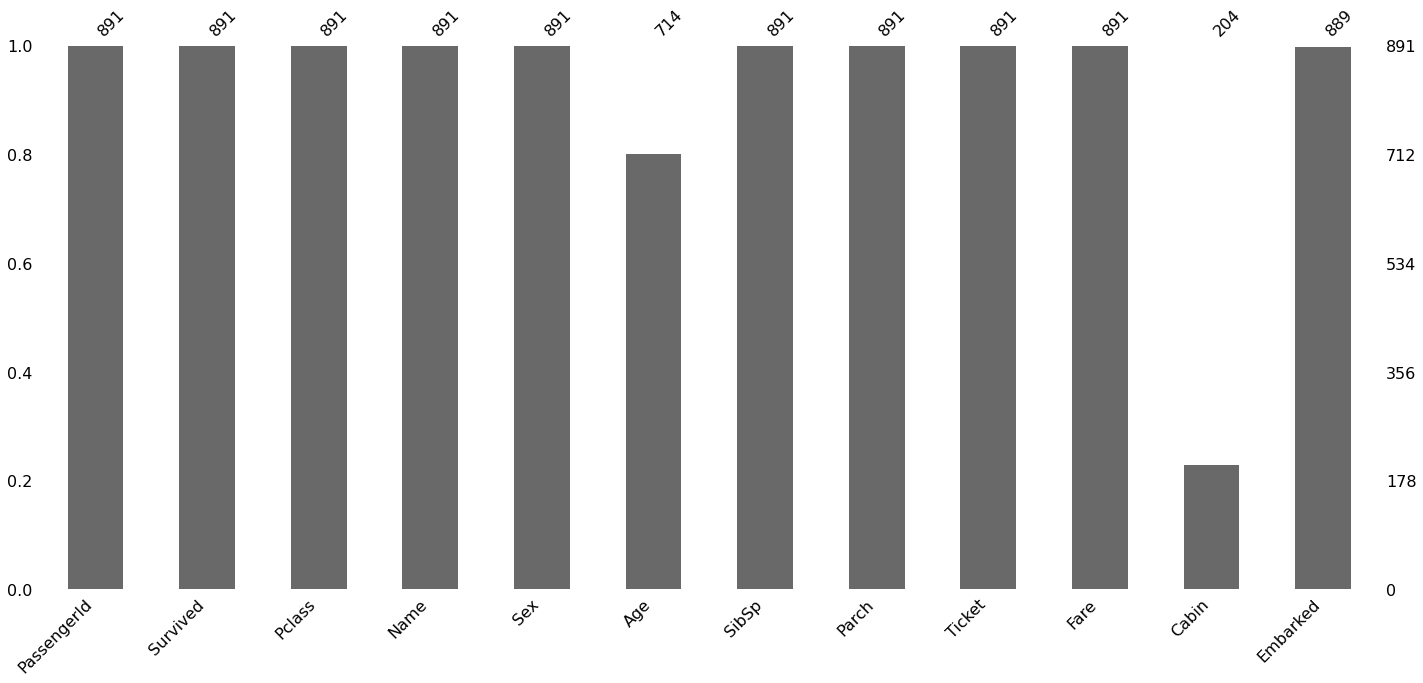

In [9]:
msno.bar(train_data)
plt.show()

In [10]:
corrmat = df.corr()

top_corr_features = corrmat.index

plt.figure(figsize=(20,20))

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

NameError: name 'df' is not defined

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


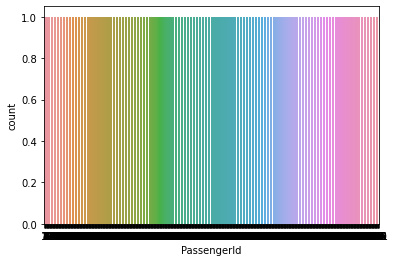

In [11]:
sns.countplot(train_data.PassengerId)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


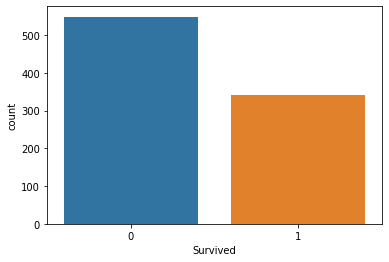

In [12]:
sns.countplot(train_data.Survived)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


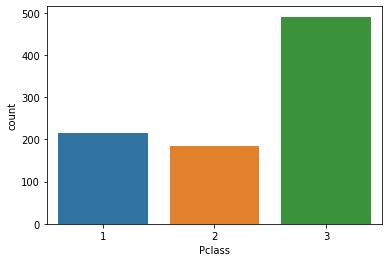

In [13]:
sns.countplot(train_data.Pclass)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


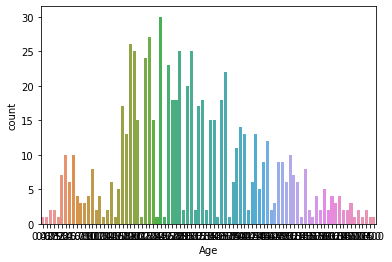

In [14]:
sns.countplot(train_data.Age)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


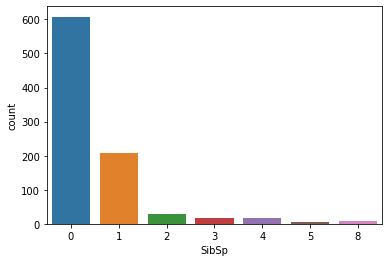

In [15]:
sns.countplot(train_data.SibSp)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


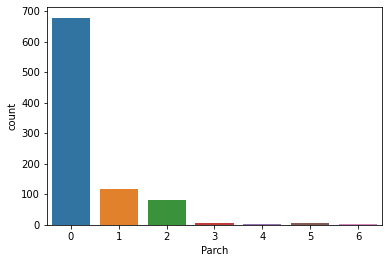

In [16]:
sns.countplot(train_data.Parch)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


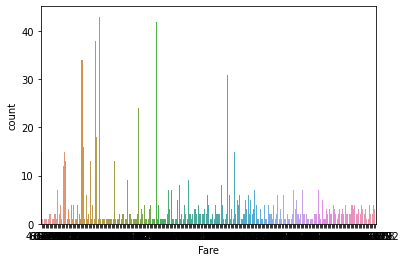

In [17]:
sns.countplot(train_data.Fare)
plt.show()

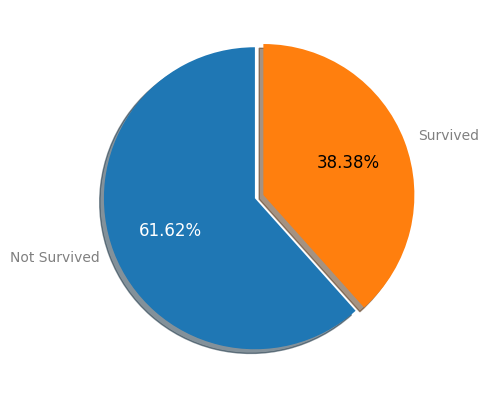

In [18]:
values = train_data['Survived'].value_counts()
labels = ['Not Survived', 'Survived']

fig, ax = plt.subplots(figsize = (5, 5), dpi = 100)
explode = (0, 0.06)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 12, color = 'white')
autotexts[1].set_color('black')
plt.show()

In [19]:
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [20]:
train_data.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [21]:
train_data.Name.value_counts()

Mineff, Mr. Ivan                                   1
Mellinger, Miss. Madeleine Violet                  1
Davison, Mrs. Thomas Henry (Mary E Finck)          1
McCormack, Mr. Thomas Joseph                       1
Carter, Mrs. Ernest Courtenay (Lilian Hughes)      1
                                                  ..
Klasen, Mr. Klas Albin                             1
Lobb, Mrs. William Arthur (Cordelia K Stanlick)    1
Becker, Miss. Marion Louise                        1
Kalvik, Mr. Johannes Halvorsen                     1
Willey, Mr. Edward                                 1
Name: Name, Length: 891, dtype: int64

In [22]:
len(train_data.Name.unique()), train_data.shape

(891, (891, 12))

In [23]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [24]:
train_data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [25]:
train_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [26]:
train_data.Parch.value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [27]:
train_data.Ticket.value_counts()

1601         7
347082       7
CA. 2343     7
347088       6
CA 2144      6
            ..
113050       1
C.A. 5547    1
237668       1
330923       1
65304        1
Name: Ticket, Length: 681, dtype: int64

In [28]:
len(train_data.Ticket.unique())

681

In [29]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

**DATA PRE-PROCESSING**

In [30]:
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [31]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [32]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [33]:
# replacing Zero values of "fare" column with mean of column

train_data['Fare'] = train_data['Fare'].replace(0, train_data['Fare'].mean())

In [34]:
#replacing Age value of "Age" column with mean of column

train_data['Age'].fillna(train_data['Age'].mean(), inplace = True)

In [35]:
# filling null values of "Embarked" column with mode value of the column

train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True)

In [36]:
# checking for null values after filling null values

train_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [37]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [38]:
train_data['Sex'] = train_data['Sex'].apply(lambda val: 1 if val == 'male' else 0)

In [39]:
train_data['Embarked'] = train_data['Embarked'].map({'S' : 0, 'C': 1, 'Q': 2})

In [40]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [41]:
train_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.746366,0.361392
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.514272,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,4.012500,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,15.100000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,32.204208,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [42]:
train_data.var()

Survived       0.236772
Pclass         0.699015
Sex            0.228475
Age          169.052400
SibSp          1.216043
Parch          0.649728
Fare        2451.663181
Embarked       0.404081
dtype: float64

**Variance in "Fare" column is very high so we have to normalize these columns.**

In [43]:
train_data['Age'] = np.log(train_data['Age'])
train_data['Fare'] = np.log(train_data['Fare'])

In [44]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,3.091042,1,0,1.981001,0
1,1,1,0,3.637586,1,0,4.266662,1
2,1,3,0,3.258097,0,0,2.070022,0
3,1,1,0,3.555348,1,0,3.972177,0
4,0,3,1,3.555348,0,0,2.085672,0


**Titanic Test data**

In [45]:
test_data = pd.read_csv("../input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**To cleaning the test data**

In [46]:
test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [47]:
test_data['Fare'] = test_data['Fare'].replace(0, test_data['Fare'].mean())

In [48]:
test_data['Age'].fillna(test_data['Age'].mean(), inplace = True)

In [49]:
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace = True)

In [50]:
test_data.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [51]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace = True)

In [52]:
test_data['Sex'] = test_data['Sex'].apply(lambda val: 1 if val == 'male' else 0)

In [53]:
test_data['Embarked'] = test_data['Embarked'].map({'S' : 0, 'C': 1, 'Q': 2})

In [54]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [55]:
test_data['Age'] = np.log(test_data['Age'])
test_data['Fare'] = np.log(test_data['Fare'])

In [56]:
test_data.var()

Pclass      0.708690
Sex         0.231960
Age         0.482596
SibSp       0.804178
Parch       0.963203
Fare        0.973274
Embarked    0.469932
dtype: float64

In [57]:
test_data.isna().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [58]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,3.540959,0,0,2.057860,2
1,3,0,3.850148,1,0,1.945910,0
2,2,1,4.127134,0,0,2.270836,2
3,3,1,3.295837,0,0,2.159003,0
4,3,0,3.091042,1,1,2.508582,0


In [59]:
X = train_data.drop('Survived', axis = 1)
y = train_data['Survived']

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

**TO PERFORM THE MACHINE LEARNING MODELS**

**LOGISTIC REGRESSION**

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr_acc = accuracy_score(y_test, lr.predict(X_test))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {lr_acc}")

print(f"Confusion Matrix :- \n {confusion_matrix(y_test, lr.predict(X_test))}")
print(f"Classofocation Report : -\n {classification_report(y_test, lr.predict(X_test))}")

Training Accuracy of Logistic Regression is 0.8105939004815409
Test Accuracy of Logistic Regression is 0.8134328358208955
Confusion Matrix :- 
 [[145  23]
 [ 27  73]]
Classofocation Report : -
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       168
           1       0.76      0.73      0.74       100

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [64]:
#hyper parameter tuning 

from sklearn.model_selection import GridSearchCV

grid_param = {
    'penalty': ['l1', 'l2'],
    'C' : [0.001, 0.01, 0.1, 0.005, 0.5, 1, 10]
}

grid_search_lr = GridSearchCV(lr, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.61156129        nan 0.72548387        nan 0.81384516
        nan 0.70461935        nan 0.80743226        nan 0.80421935
        nan 0.80263226]
  category=UserWarning


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.005, 0.5, 1, 10],
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [65]:
print(grid_search_lr.best_params_)
print(grid_search_lr.best_score_)

{'C': 0.1, 'penalty': 'l2'}
0.8138451612903227


In [66]:
lr = grid_search_lr.best_estimator_

# accuracy score, confusion matrix and classification report of logistic regression

lr_acc = accuracy_score(y_test, lr.predict(X_test))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {lr_acc}")

print(f"Confusion Matrix :- \n {confusion_matrix(y_test, lr.predict(X_test))}")
print(f"Classofocation Report : -\n {classification_report(y_test, lr.predict(X_test))}")

Training Accuracy of Logistic Regression is 0.8105939004815409
Test Accuracy of Logistic Regression is 0.8171641791044776
Confusion Matrix :- 
 [[149  19]
 [ 30  70]]
Classofocation Report : -
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       168
           1       0.79      0.70      0.74       100

    accuracy                           0.82       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.82      0.82      0.81       268

